In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier #for classification
from sklearn.tree import DecisionTreeRegressor #for regression
from sklearn.ensemble import RandomForestClassifier #for classification
from sklearn.ensemble import RandomForestRegressor #for regression
from sklearn.ensemble import BaggingClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.sandbox.stats.runs import runstest_1samp

from scipy.stats import pearsonr,spearmanr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("D:\\Data Science\\Machine Leaning\\Assessment\\Decision Tree + Random Forest + Ensemble Techniques")
os.getcwd()

'D:\\Data Science\\Machine Leaning\\Assessment\\Decision Tree + Random Forest + Ensemble Techniques'

#### Reading the csv file:

In [3]:
df=pd.read_csv("admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Displaying basic information of the dataset:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Key Highlights from dataset:
Average GRE Score: 316.47

Average TOEFL Score: 107.19

Average CGPA: 8.58

With Research: 56% of applicants

In [6]:
df.shape

(500, 9)

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

#### Checking for missing values in the dataset:

In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset.

#### Splitting data into numerical and categorical features:

In [9]:
#numerical features in the dataset

# list of numerical variables
numerical_features = ['GRE Score','TOEFL Score','CGPA']
# visualise the numerical variables
print("Numerical features are:")
df[numerical_features].head()

Numerical features are:


,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [10]:
#categorical features in the data set
categorical_features=['University Rating','SOP','LOR','Research']

for feature in categorical_features:
    print('The Categorical feature is',feature,"and number of categories in each species are:",len(df[feature].unique()))
    print(df[feature].value_counts())
# visualise the categorical variables
print("Categorical features are:")
df[categorical_features].head()

The Categorical feature is University Rating and number of categories in each species are: 5
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
The Categorical feature is SOP and number of categories in each species are: 9
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64
The Categorical feature is LOR and number of categories in each species are: 9
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64
The Categorical feature is Research and number of categories in each species are: 2
1    280
0    220
Name: Research, dtype: int64
Categorical features are:


,University Rating,SOP,LOR,Research
0,4,4.5,4.5,1
1,4,4.0,4.5,1
2,3,3.0,3.5,1
3,3,3.5,2.5,1
4,2,2.0,3.0,0


In [11]:
df1=df.copy()

In [12]:
#Since serial number is a unique column we can just drop it
df1=df1.drop(['Serial No.'],axis=1)

In [13]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Question 1: Perform Exploratory Data Analysis (EDA) tasks 
1. Visualize the 10 random rows of the data set
2. Generate the description for numeric variables
3. Check the shape of the data set
4. Generate the correlation matrix
5. Generate a correlogram

In [14]:
#1.1 Visualize the 10 random rows of the data set
#Here we visualize first 10 rows, next we will see 10 random rows
df1.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [263]:
#10 random rows
df1.sample(n = 10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
455,305,102,2,1.5,2.5,7.64,0,0
355,317,106,2,2.0,3.5,8.12,0,0
244,314,107,2,2.5,4.0,8.56,0,0
398,312,103,3,3.5,4.0,8.78,0,0
296,310,107,3,3.5,3.5,8.67,0,0
36,299,106,2,4.0,4.0,8.40,0,0
153,324,105,3,3.0,4.0,8.75,0,0
299,305,112,3,3.0,3.5,8.65,0,0
250,320,104,3,3.0,2.5,8.57,1,0
214,331,117,4,4.5,5.0,9.42,1,1


In [15]:
#1.2 Generate the description for numeric variables
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
#1.3 Check the shape of the data set
df1.shape

(500, 8)

In [17]:
#1.4 Generate the correlation matrix
df1.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


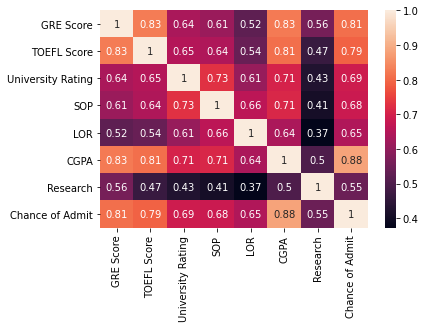

In [18]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

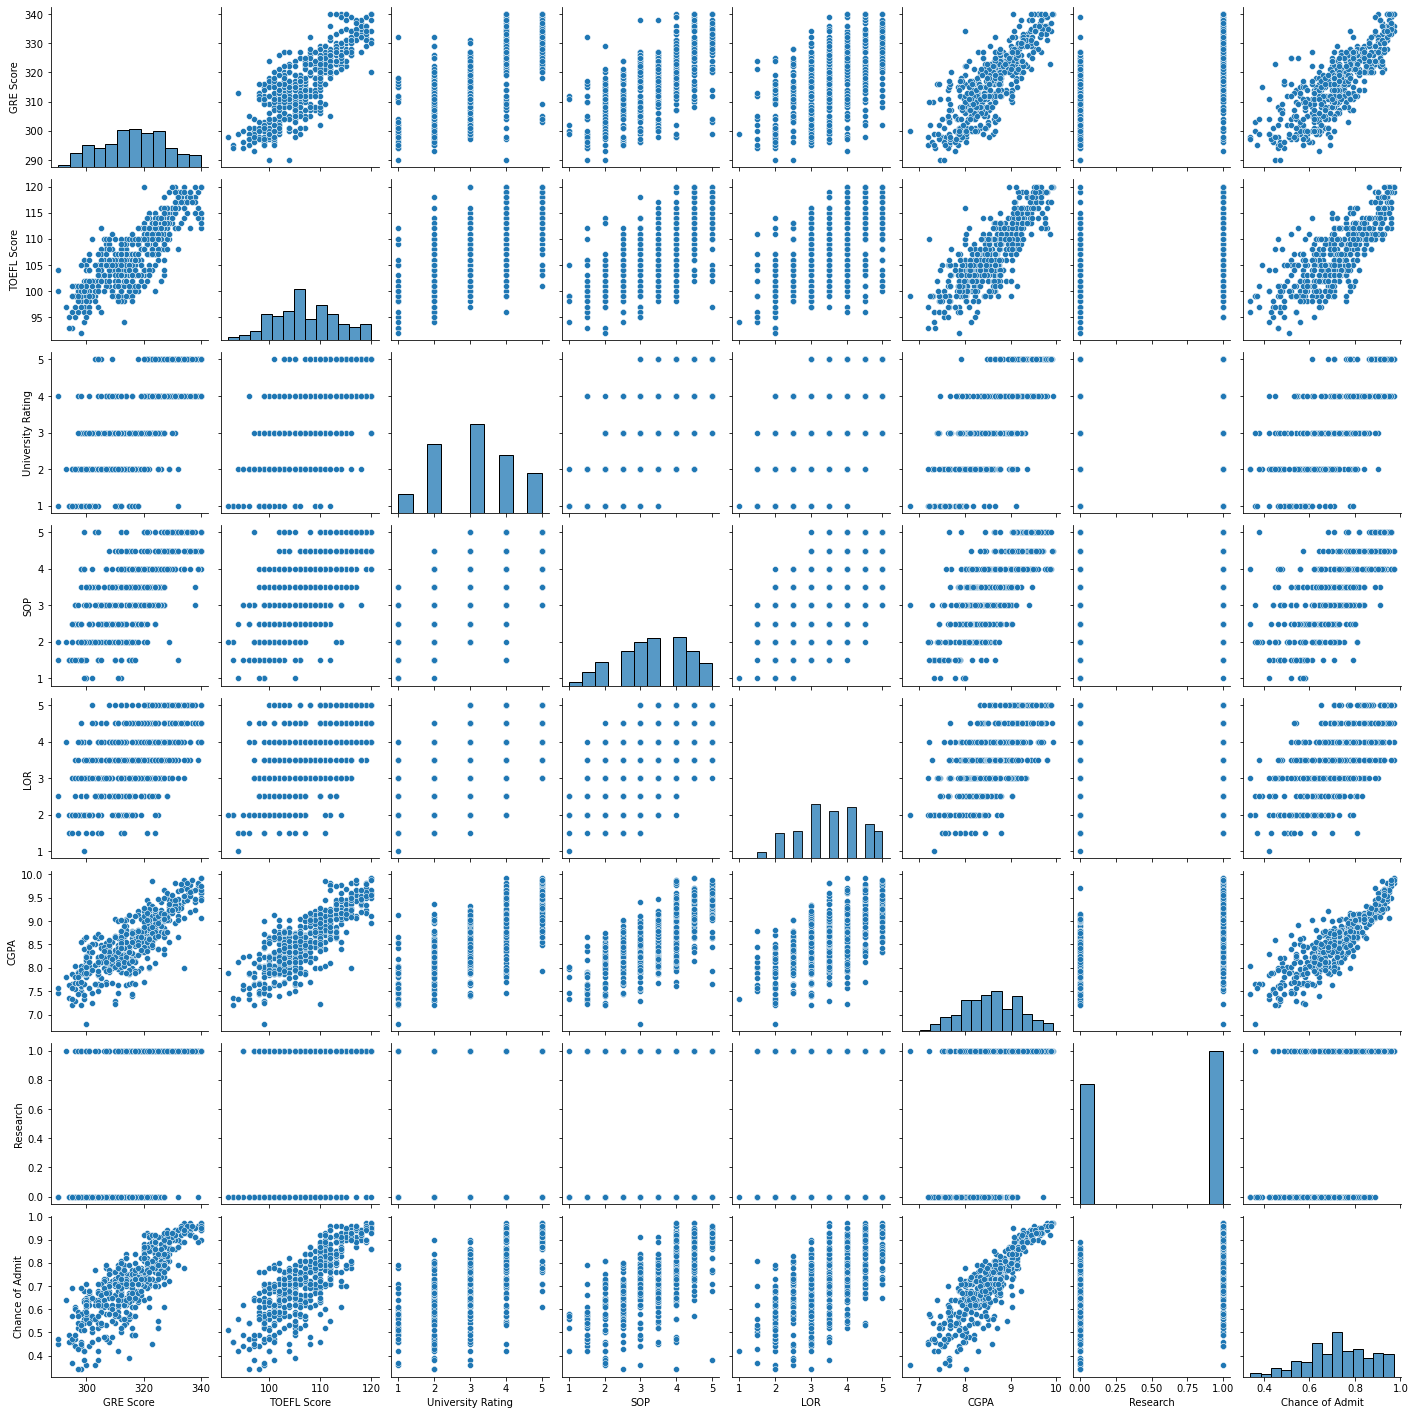

In [19]:
#1.5 Generate a correlogram
sns.pairplot(df1)
plt.show()

### Question 2: Find out the minimum and maximum values for GRE score

In [20]:
print("Maximum GRE Score:",df1['GRE Score'].max())
print("Minimum GRE Score:",df1['GRE Score'].min())

Maximum GRE Score: 340
Minimum GRE Score: 290


### Question 3: Find out the percentage of universities for each university rating

In [21]:
print("Percentage of each university based on university rating:")
print((df1['University Rating'].value_counts(ascending=True)/df.shape[0])*100)

Percentage of each university based on university rating:
1     6.8
5    14.6
4    21.0
2    25.2
3    32.4
Name: University Rating, dtype: float64


More universities has a rating of 3 and very few universities has a rating of 1.

### Question 4: Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that:

Students having the “Chance of Admit” value > 0.80, are assigned value 1

Students having the “Chance of Admit” value < 0.80, are assigned value 0

Where 0: Low chance of Admission and 1: High chance of admission
        

In [22]:
df1['Chance of Admit']=np.where(df1['Chance of Admit'].values<=0.80,0,1)
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [23]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [24]:
df1['Chance of Admit']=df1['Chance of Admit'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    int64   
 7   Chance of Admit    500 non-null    category
dtypes: category(1), float64(3), int64(4)
memory usage: 28.1 KB


In [260]:
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


### EDA:

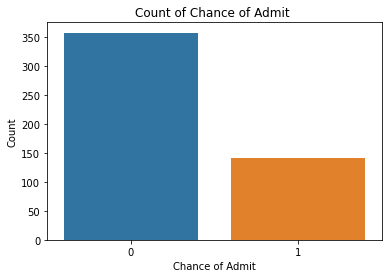

In [25]:
#Dependent variable:
sns.countplot(x=df1['Chance of Admit'],data=df1)
plt.xlabel('Chance of Admit')
plt.ylabel("Count")
plt.title('Count of Chance of Admit ')
plt.show()

The chance of getting admitted to any university is less compared to chance of not getting admit. Let us now see what factors influence how much in this.

#### 1. How does chance of getting admitted depend on categorical features?

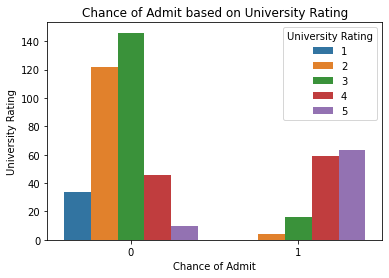

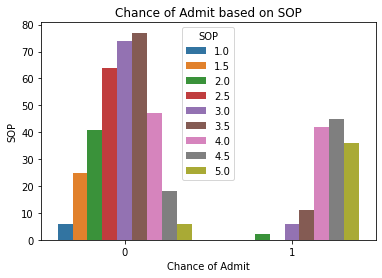

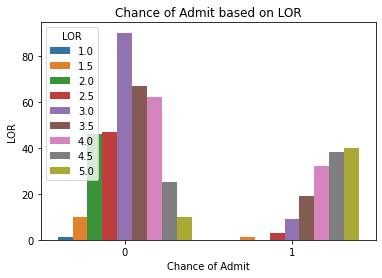

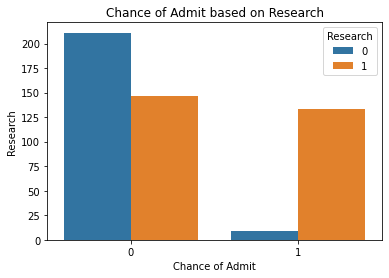

In [253]:
for feature in df1.columns:
    if feature not in ['GRE Score','TOEFL Score','CGPA','Chance of Admit']:
        sns.countplot(x=df1['Chance of Admit'],hue=feature,data=df1)
        plt.xlabel('Chance of Admit')
        plt.ylabel(feature)
        plt.title('Chance of Admit based on {}'.format(feature))
        plt.show()

1. The Chance of Admit based on University rating: Chance of admit with university rating 1 is not possible, meaning no one is getting admitted to a university with rating 1. Chance of getting rejected is more for university rating of 3 and then 2 which is obvious because of the competetion among the average students. Although chance of getting admitted to a university with 5 rating is more if we get the admit. 
2. The Chance of Admit based on SOP: The chance of getting admitted is more for a Sop score of 4.5 while chance of getting rejected if more for a sop rating of 3.5.
3. The Chance of Admit based on LOR: The chance of getting admitted is more for a lor score of 5 while chance of getting rejected if more for a sop rating of 3.
4. The Chance of Admit based on Research: Chance of getting rejected by an university is more if we don'tdo research, whereas doing research and still getting rejected is just as equal as doing research and getting selected.

#### 2. Are people scoring comparable marks in both LOR and SOP?

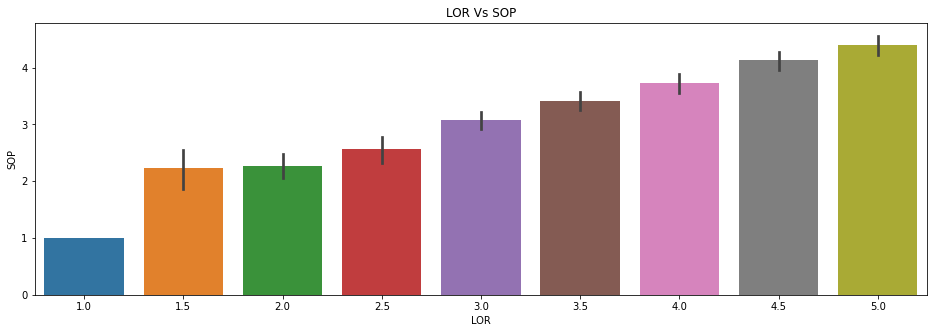

In [27]:
fig_dims = (16, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df['LOR'],y=df['SOP'],data=df)
plt.xlabel('LOR')
plt.ylabel("SOP")
plt.title('LOR Vs SOP')
plt.show()

We can see that the relationship is linear, that is as the LOR score increases, score of SOP also increases. This means that those who score good in LOR also are capable of scoring good in SOP and vice versa.

#### 3. Are people scoring comparable marks in both GRE and TOEFL?

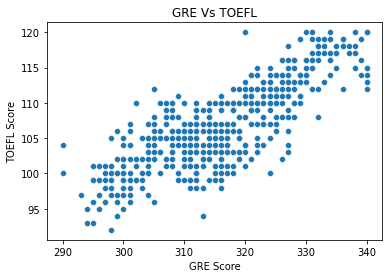

In [28]:
sns.scatterplot(data=df1,x=df1['GRE Score'],y=df1['TOEFL Score'])
plt.xlabel('GRE Score')
plt.ylabel("TOEFL Score")
plt.title('GRE Vs TOEFL')
plt.show()

We can see that the relationship is fairly linear, that is as the GRE score increases, score of TOEFL also increases. This means that those who score good in GRE also are capable of scoring good in TOEFL and vice versa.

#### 4. What is the chance of admit based on GRE Score and TOEFL Score?

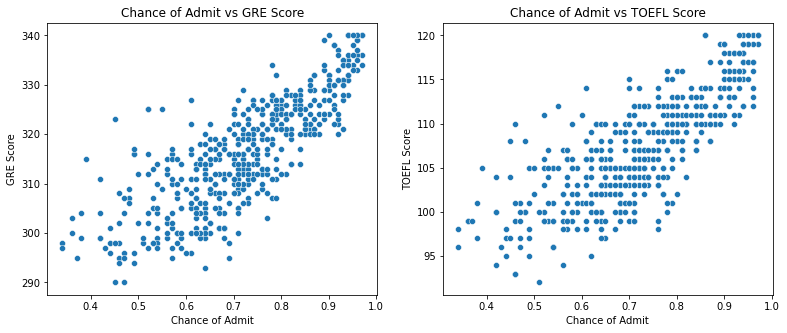

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.scatterplot(y="GRE Score",x="Chance of Admit",data=df,ax=ax1);
ax1.set_xlabel("Chance of Admit")
ax1.set_ylabel("GRE Score")
ax1.set_title("Chance of Admit vs GRE Score")

sns.scatterplot(y="TOEFL Score",x="Chance of Admit",data=df,ax=ax2);
ax2.set_xlabel("Chance of Admit")
ax2.set_ylabel("TOEFL Score")
ax2.set_title("Chance of Admit vs TOEFL Score")
plt.show()

The chance of admit is dependent on both GRE and TOEFL score. As those who have scored good marks has higher chance of admit than those who didn't. It follows a linear relation.

#### 5. What is the Chance of Admit based on CGPA?

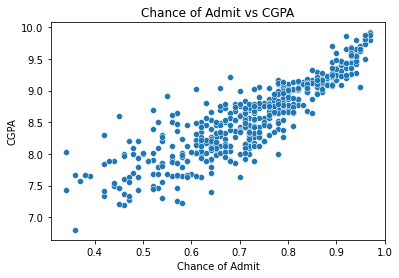

In [246]:
sns.scatterplot(y="CGPA",x="Chance of Admit",data=df)
plt.xlabel("Chance of Admit")
plt.ylabel("CGPA")
plt.title("Chance of Admit vs CGPA")
plt.show()

The chance of admit is dependent on the CGPA. As those who have scored good marks has higher chance of admit than those who didn't. It follows a linear relation.

#### 6. Does universties with higher rating demand more marks in LOR and SOP?

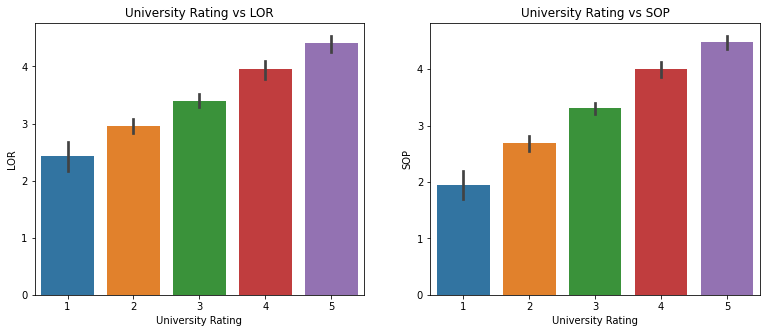

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.barplot(y="LOR",x="University Rating",data=df,ax=ax1);
ax1.set_xlabel("University Rating")
ax1.set_ylabel("LOR")
ax1.set_title("University Rating vs LOR")

sns.barplot(y="SOP",x="University Rating",data=df,ax=ax2);
ax2.set_xlabel("University Rating")
ax2.set_ylabel("SOP")
ax2.set_title("University Rating vs SOP")
plt.show()

Yes, we can see that as the university rating goes up the LOR and SOP marks also goes up, which implies if we have to apply for a top tier university with good rating we need good LOR and SOP score.

#### 7. Does universties with higher rating demand more CGPA?¶

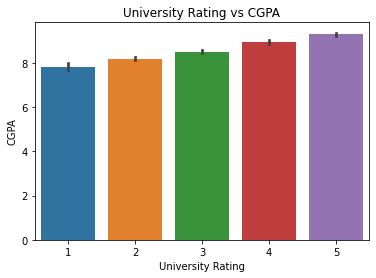

In [32]:
sns.barplot(y="CGPA",x="University Rating",data=df)
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.title("University Rating vs CGPA")
plt.show()

Yes, we can see that as the university rating goes up the CGPA also goes up, which implies if we have to apply for a top tier university with good rating we need get good CGPA.

#### 8. Does universties with higher rating demand more candidates who have done research?

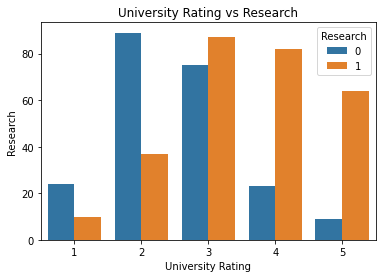

In [33]:
sns.countplot(hue="Research",x="University Rating",data=df)
plt.xlabel("University Rating")
plt.ylabel("Research")
plt.title("University Rating vs Research")
plt.show()

Yes, we can see that the universities with more rating prefer candidates who have done Research.

#### 9. Does Chance of Admit demand candidates who have done research?

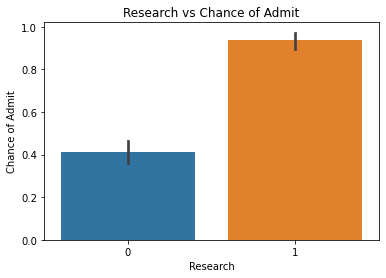

In [252]:
sns.barplot(y="Research",x="Chance of Admit",data=df1)
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.title("Research vs Chance of Admit")
plt.show()

Yes, Chance of admit is more if we have done research as compared to not doing research.

#### 10. Does top tier or high ranked universities take more or less admit?

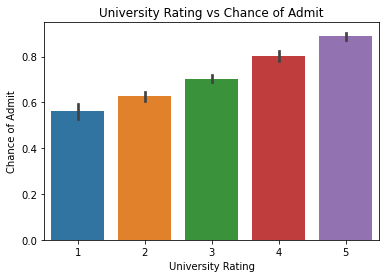

In [35]:
sns.barplot(x="University Rating",y="Chance of Admit",data=df)
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("University Rating vs Chance of Admit")
plt.show()

The chance of getting to a top tier university is also more compared to others.

#### 11. What are the chances that those who have scored high CGPA also has done research?

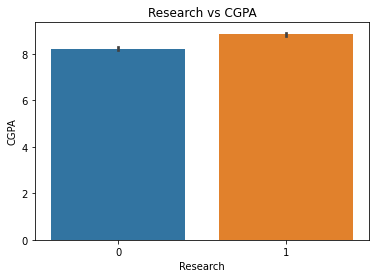

In [36]:
sns.barplot(x="Research",y="CGPA",data=df)
plt.xlabel("Research")
plt.ylabel("CGPA")
plt.title("Research vs CGPA")
plt.show()

The propotion is more or less equal, we cannot clearly say if those who did research also has higher cgpa.

#### 12. Does scoring more CGPA also imply they will score more GRE Score and TOEFL Score?

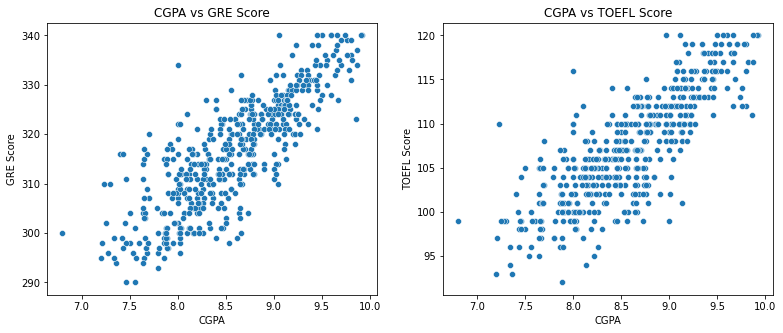

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.scatterplot(y="GRE Score",x="CGPA",data=df,ax=ax1);
ax1.set_xlabel("CGPA")
ax1.set_ylabel("GRE Score")
ax1.set_title("CGPA vs GRE Score")

sns.scatterplot(y="TOEFL Score",x="CGPA",data=df,ax=ax2);
ax2.set_xlabel("CGPA")
ax2.set_ylabel("TOEFL Score")
ax2.set_title("CGPA vs TOEFL Score")
plt.show()

Yes, the students who have more CGPA also tend to get more marks in GRE and TOEFL.

#### 13. What is the percentage of each university based on rating?

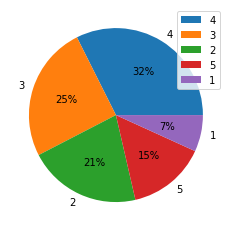

In [256]:
plt.pie(x=df['University Rating'].value_counts(), labels = df['University Rating'].unique(),data=df,autopct='%.0f%%')
plt.legend()
plt.show()

There are more universities with Rank:4, while there are very few universities with Rank:1.

#### 14. How much percentage of students have done research out of the total?

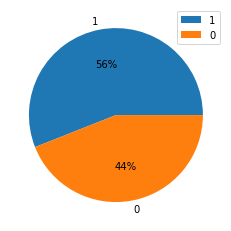

In [255]:
plt.pie(x=df['Research'].value_counts(), labels = df['Research'].unique(),data=df,autopct='%.0f%%')
plt.legend()
plt.show()

So, 44% of the total students have not done Research while, 56% of the students have.

#### 15. What is the percentage of Chance of admit for above and below 80%?

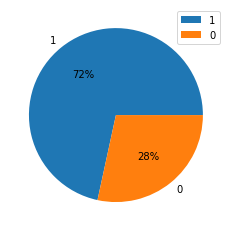

In [254]:
plt.pie(x=df1['Chance of Admit'].value_counts(), labels = df1['Chance of Admit'].unique(),data=df1,autopct='%.0f%%')
plt.legend()
plt.show()

The chance of Admit is 72% whereas chance of reject is 28%.

#### 16. Based on University Rating and Chance of admit, find how other features varies?

In [41]:
table = pd.pivot_table(data=df1,index=['Chance of Admit','University Rating'])
table1 = pd.DataFrame(table)
table1

CGPA   GRE Score       LOR  Research  \
Chance of Admit University Rating                                             
0               1                  7.798529  304.911765  2.426471  0.294118   
                2                  8.154180  308.598361  2.967213  0.278689   
                3                  8.443151  314.171233  3.356164  0.500000   
                4                  8.515435  316.826087  3.641304  0.608696   
                5                  8.642000  313.700000  3.850000  0.200000   
1               2                  8.897500  325.500000  2.625000  0.750000   
                3                  9.020000  322.875000  3.812500  0.875000   
                4                  9.265085  328.355932  4.186441  0.915254   
                5                  9.379048  330.142857  4.492063  0.984127   

                                        SOP  TOEFL Score  
Chance of Admit University Rating                         
0               1                  1.941176   100.205882  
                2                  2.668033   103.163934  
                3                  3.270548   105.726027  
                4                  3.608696   107.565217  
                5                  4.100000   106.000000  
1               2                  3.125000   112.000000  
                3                  3.656250   111.687500  
                4                  4.305085   113.610169  
                5                  4.539683   114.619048

Here we are getting the average score of CGPA, GRE Score, TOEFL Score, SOP and LOR based on the rating of university and chance of admit. There is no Chance of Admit for university with rank 1.

### Model Building:

In [42]:
df2=df1.copy()
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


#### LOGISTIC REGRESSION:

In [43]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


#### Multi collinearity check using Variance Inflation Factor(VIF):

In [187]:
df2.corr()

,GRE Score,TOEFL Score,CGPA
GRE Score,1.000000,0.827200,0.825878
TOEFL Score,0.827200,1.000000,0.810574
CGPA,0.825878,0.810574,1.000000


In [188]:
vif = pd.DataFrame()
vif['feature'] = numerical_features
vif['VIF'] = [variance_inflation_factor(df2.iloc[:,[0,1,5]].values,i) for i in range(len(df1.iloc[:,[0,1,5]].columns))]

In [189]:
vif

,feature,VIF
0,GRE Score,950.068134
1,TOEFL Score,1163.462151
2,CGPA,637.535085


There is a problem of multi-collinearity in the numerical features and the feature TOEFL Score is most influenced by other two features.

#### Prevalence Rate: 
It is used to find if the data set is balanced or not. The condition for balanced data is the minority class of the dataset should have more than 25% of data. Example: 60-40,70-30. In this the minority class is having 40 and 30 percent of data respectively. So such dataset are balanced.

We can use this to find the metrics that we will adopt for the model.

If the actual value is 0 and model is predicting 1, it is called 'False-Positive(FP)'.
If the actual value is 1 and model is predicting 0, it is called 'False-Negative(FN)'.
If the actual value is 0 and model is predicting 0, it is called 'True-Negative(TN)'.
If the actual value is 1 and model is predicting 1, it is called 'True-Positive(TP)'.
If the dataset is balanced the metrics we use is Accuracy. Else depending on 'False-Positive(FP)' and 'False-Negative(FN)' and their misclassification we can go for Precision, Recall or F1-Score.

If concentration is more on FP -> Metrics = Precision.

If concentration is more on FN -> Metrics = Recall.

If concentration is more on both FN and FP -> Metrics = F1-Score. [Misclassification]

If concentration is more on both TN and TP -> Metrics = Accuracy. [Correct Classification]

In [44]:
#Prevalence rate of the dataset
df2['Chance of Admit'].value_counts(normalize=True)

0    0.716
1    0.284
Name: Chance of Admit, dtype: float64

The dataset is balanced since minority class has more than 25% of the data.

In [45]:
df2['Chance of Admit']=df2['Chance of Admit'].astype('category')

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    int64   
 7   Chance of Admit    500 non-null    category
dtypes: category(1), float64(3), int64(4)
memory usage: 28.1 KB


In [47]:
for feature in ['University Rating','SOP','LOR','Research']:
    df2[feature]=df2[feature].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    category
dtypes: category(5), float64(1), int64(2)
memory usage: 15.5 KB


#### Splitting the data into dependent(y) and independent(x):

In [48]:
x=df2.drop('Chance of Admit',axis=1)
y=df2.iloc[:,-1]

In [49]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [50]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Chance of Admit, dtype: category
Categories (2, int64): [0, 1]

#### Splitting the data to train and test:

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=28,stratify=y)

In [52]:
print("Shape of train data:")
print("\nShape of X train:",xtrain.shape)
print("Shape of Y train:",ytrain.shape)
print("\nShape of test data:")
print("\nShape of X test:",xtest.shape)
print("Shape of Y test:",ytest.shape)

Shape of train data:

Shape of X train: (400, 7)
Shape of Y train: (400,)

Shape of test data:

Shape of X test: (100, 7)
Shape of Y test: (100,)


#### Performing MinMaxScaling on the data:

In [53]:
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [54]:
xtrain

array([[0.3       , 0.42857143, 0.25      , ..., 0.125     , 0.31832797,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46623794,
        0.        ],
       [0.48      , 0.5       , 0.5       , ..., 1.        , 0.67524116,
        0.        ],
       ...,
       [0.78      , 0.96428571, 0.75      , ..., 0.875     , 0.75884244,
        1.        ],
       [0.76      , 0.82142857, 0.75      , ..., 0.75      , 0.75884244,
        1.        ],
       [0.5       , 0.42857143, 0.5       , ..., 0.375     , 0.41800643,
        0.        ]])

In [55]:
xtest

array([[0.34      , 0.46428571, 0.75      , 0.5       , 0.5       ,
        0.36655949, 0.        ],
       [0.56      , 0.64285714, 0.        , 0.375     , 0.625     ,
        0.55948553, 1.        ],
       [0.3       , 0.71428571, 0.5       , 0.5       , 0.625     ,
        0.59485531, 0.        ],
       [0.56      , 0.53571429, 0.5       , 0.5       , 0.625     ,
        0.47266881, 1.        ],
       [0.46      , 0.35714286, 0.5       , 0.625     , 0.75      ,
        0.67524116, 1.        ],
       [0.28      , 0.35714286, 0.25      , 0.5       , 0.75      ,
        0.62057878, 0.        ],
       [0.4       , 0.32142857, 0.5       , 0.625     , 1.        ,
        0.59485531, 1.        ],
       [0.96      , 1.        , 0.75      , 1.        , 1.        ,
        0.91961415, 1.        ],
       [0.52      , 0.21428571, 0.        , 0.125     , 0.25      ,
        0.20257235, 0.        ],
       [0.44      , 0.53571429, 0.5       , 0.5       , 0.25      ,
        0.35369775, 1. 

In [56]:
lom=LogisticRegression()
lom.fit(xtrain,ytrain)

LogisticRegression()

In [193]:
print("Intercept value:",lom.intercept_)
print("\nCo-efficients value:\n",lom.coef_)

Intercept value: [-9.97527686]

Co-efficients value:
 [[2.04192646 2.62321747 2.37786325 1.47739545 1.19151048 3.23384328
  1.18224323]]


In [217]:
#predicting ytrain and ytest value using xtrain and xtest
train_pred_lr=lom.predict(xtrain)
test_pred_lr=lom.predict(xtest)
print("Y Train predicted:\n",train_pred_lr)
print("\nY Test predicted:\n",test_pred_lr)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [162]:
print("\t\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_lr))
print("Testing accuracy:",accuracy_score(ytest,test_pred_lr))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_lr))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_lr))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_lr))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_lr))
print('_'*100)

					*****ACCURACY*****

Training accuracy: 0.935
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[279   7]
 [ 19  95]]

Confustion matrix of test data:
 [[71  1]
 [ 3 25]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.94      0.98      0.96       286
           1       0.93      0.83      0.88       114

    accuracy                           0.94       400
   macro avg       0.93      0.90      0.92       400
weighted avg       0.93      0.94      0.93       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

         

There is no overfitting problem and model is showing 94% train and 96% test accuracy.

### Question 5: Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

#### DECISION TREE:

In [59]:
dt = DecisionTreeClassifier()
dt = dt.fit(xtrain,ytrain)

In [218]:
train_pred_dt=dt.predict(xtrain)
test_pred_dt=dt.predict(xtest)
print("Y Train predicted:\n",train_pred_dt)
print("\nY Test predicted:\n",test_pred_dt)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [165]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_dt))
print("Testing accuracy:",accuracy_score(ytest,test_pred_dt))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_dt))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_dt))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_dt))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_dt))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[286   0]
 [  0 114]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       114

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

           0

The model is giving 100% accuracy in training. Let us do hyperparamter tuning to overcome this.

In [62]:
dt1 = DecisionTreeClassifier(min_samples_split=6,max_depth=2,ccp_alpha=0.05)
dt1 = dt1.fit(xtrain,ytrain)

In [219]:
train_pred_dt1=dt1.predict(xtrain)
test_pred_dt1=dt1.predict(xtest)
print("Y Train predicted:\n",train_pred_dt1)
print("\nY Test predicted:\n",test_pred_dt1)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [168]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_dt1))
print("Testing accuracy:",accuracy_score(ytest,test_pred_dt1))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_dt1))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_dt1))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_dt1))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_dt1))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.9175
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[266  20]
 [ 13 101]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94       286
           1       0.83      0.89      0.86       114

    accuracy                           0.92       400
   macro avg       0.89      0.91      0.90       400
weighted avg       0.92      0.92      0.92       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

         

We can clearly see that after tuning the model we have overcome the problem and model has an accuracy of 92% for training and 96% for test.

### Question 6: Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

#### RANDOM FOREST:

In [209]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [211]:
pd.DataFrame(rf.feature_importances_,index=xtrain.columns).plot.bar();

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

As I have done MinMaxScaling this is not working, let me try and do it on train and test which hasn't been scaled to find important features alone.

In [212]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=28,stratify=y)

#### NOTEEEEE: I am testing and training the model again because it was not accepting xtrain and ytrain values after scaling. So to check for feature importance we need to give the model X_train and Y_train which hasn't been scaled yet.

In [213]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

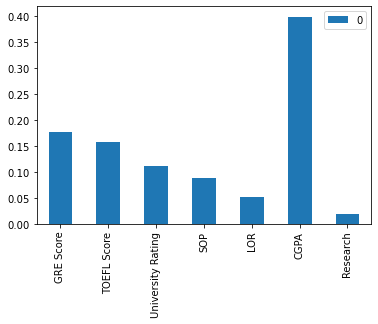

In [214]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns).plot.bar();

We can see that the CGPA is most important feature whereas Research is the least important. Now let us build two models by first not dropping and then dropping the least important features.

In [206]:
rf1 = RandomForestClassifier()
rf1.fit(xtrain,ytrain)

RandomForestClassifier()

I'm using the values which has been scaled down to fit the model.

In [216]:
train_pred_rf1=rf1.predict(xtrain)
test_pred_rf1=rf1.predict(xtest)
print("Y Train predicted:\n",train_pred_rf1)
print("\nY Test predicted:\n",test_pred_rf1)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [208]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_rf1))
print("Testing accuracy:",accuracy_score(ytest,test_pred_rf1))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_rf1))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_rf1))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_rf1))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_rf1))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[286   0]
 [  0 114]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       114

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

           0

We have 0s in confusion matrix. Let us now do hyper paramter tuning in the model and see if this changes.

In [71]:
rf2 = RandomForestClassifier(max_depth=2,min_samples_split=6)
rf2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, min_samples_split=6)

In [220]:
train_pred_rf2=rf2.predict(xtrain)
test_pred_rf2=rf2.predict(xtest)
print("Y Train predicted:\n",train_pred_rf2)
print("\nY Test predicted:\n",test_pred_rf2)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [244]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_rf2))
print("Testing accuracy:",accuracy_score(ytest,test_pred_rf2))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_rf2))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_rf2))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_rf2))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_rf2))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.935
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[278   8]
 [ 18  96]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       286
           1       0.92      0.84      0.88       114

    accuracy                           0.94       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.94      0.93       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

          

We can clearly see that after tuning the model we have overcome the overfitting problem and model has an accuracy of 94% for training and 96% for test.

Let us see if there is any improvement if we remove the least important feature. I am dropping research.

In [74]:
x1=df2.drop(columns=['Chance of Admit','Research'],axis=1)
y1=df2.iloc[:,-1]

In [75]:
x1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [76]:
y1.head()

0    1
1    0
2    0
3    0
4    0
Name: Chance of Admit, dtype: category
Categories (2, int64): [0, 1]

In [77]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.2,random_state=28,stratify=y1)

In [239]:
print("Shape of train data:")
print("\nShape of X train:",xtrain1.shape)
print("Shape of Y train:",ytrain1.shape)
print("\nShape of test data:")
print("\nShape of X test:",xtest1.shape)
print("Shape of Y test:",ytest1.shape)

Shape of train data:

Shape of X train: (400, 6)
Shape of Y train: (400,)

Shape of test data:

Shape of X test: (100, 6)
Shape of Y test: (100,)


In [78]:
xtrain1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
440,305,104,2,2.5,1.5,7.79
102,314,106,2,4.0,3.5,8.25
74,314,106,3,3.0,5.0,8.90
187,335,118,5,4.5,3.5,9.44
300,309,106,2,2.5,2.5,8.00
...,...,...,...,...,...,...
91,299,97,3,5.0,3.5,7.66
334,312,107,4,4.5,4.0,8.65
176,329,119,4,4.5,4.5,9.16
69,328,115,4,4.5,4.0,9.16


In [79]:
xtest1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
462,307,105,4,3.0,3.0,7.94
438,318,110,1,2.5,3.5,8.54
299,305,112,3,3.0,3.5,8.65
350,318,107,3,3.0,3.5,8.27
364,313,102,3,3.5,4.0,8.90
...,...,...,...,...,...,...
477,309,105,4,3.5,2.0,8.18
346,304,97,2,1.5,2.0,7.64
143,340,120,4,4.5,4.0,9.92
389,320,108,3,3.5,4.0,8.44


In [80]:
scaler=MinMaxScaler()
xtrain1=scaler.fit_transform(xtrain1)
xtest1=scaler.transform(xtest1)

In [81]:
xtrain1

array([[0.3       , 0.42857143, 0.25      , 0.375     , 0.125     ,
        0.31832797],
       [0.48      , 0.5       , 0.25      , 0.75      , 0.625     ,
        0.46623794],
       [0.48      , 0.5       , 0.5       , 0.5       , 1.        ,
        0.67524116],
       ...,
       [0.78      , 0.96428571, 0.75      , 0.875     , 0.875     ,
        0.75884244],
       [0.76      , 0.82142857, 0.75      , 0.875     , 0.75      ,
        0.75884244],
       [0.5       , 0.42857143, 0.5       , 0.75      , 0.375     ,
        0.41800643]])

In [82]:
rf3 = RandomForestClassifier()
rf3.fit(xtrain1,ytrain1)

RandomForestClassifier()

In [221]:
train_pred_rf3=rf3.predict(xtrain1)
test_pred_rf3=rf3.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf3)
print("\nY Test predicted:\n",test_pred_rf3)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [186]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf3))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf3))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf3))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf3))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf3))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf3))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 1.0
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[286   0]
 [  0 114]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       114

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

           0

Dropping feature research doesn't seem to make any improvement in the model. Now to this model I'll do hyper parameter tuning to find if after dropping research and doing tuning my model performs better or worse than not dropping research and tuning.

In [114]:
rf4 = RandomForestClassifier(max_depth=2,min_samples_split=6)
rf4.fit(xtrain1,ytrain1)

RandomForestClassifier(max_depth=2, min_samples_split=6)

In [222]:
train_pred_rf4=rf4.predict(xtrain1)
test_pred_rf4=rf4.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf4)
print("\nY Test predicted:\n",test_pred_rf4)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [180]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf4))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf4))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf4))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf4))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf4))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf4))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.935
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[278   8]
 [ 18  96]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       286
           1       0.92      0.84      0.88       114

    accuracy                           0.94       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.94      0.93       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

          

The model is having an accuracy of 94% on training and 96% on testing. But the above problem has been overcome and model performs betterafter tuning.

In [117]:
rf5 = RandomForestClassifier(max_depth=3,min_samples_split=4)
rf5.fit(xtrain1,ytrain1)

RandomForestClassifier(max_depth=3, min_samples_split=4)

In [223]:
train_pred_rf5=rf5.predict(xtrain1)
test_pred_rf5=rf5.predict(xtest1)
print("Y Train predicted:\n",train_pred_rf5)
print("\nY Test predicted:\n",test_pred_rf5)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

#### Checking for ACCURACY, CONFUSION MATRIX and CLASSIFICATION REPORT of test and train data:

In [184]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain1,train_pred_rf5))
print("Testing accuracy:",accuracy_score(ytest1,test_pred_rf5))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain1,train_pred_rf5))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest1,test_pred_rf5))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain1,train_pred_rf5))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest1,test_pred_rf5))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.945
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[280   6]
 [ 16  98]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       286
           1       0.94      0.86      0.90       114

    accuracy                           0.94       400
   macro avg       0.94      0.92      0.93       400
weighted avg       0.94      0.94      0.94       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

          

I change the parameters slightly for RF to check how RF performs. The training accuracy is at 94% whereas testign is at 96%.

#### SUMMARY OF RANDOM FOREST MODELS:

After tuning, the model in which I didn't drop research has performed more or less as efficiently as the model in which I have dropped the research.
    
1. Model in which I did not dropped the feature-Research and did tuning has accuracy of:
    
    Training accuracy: 0.94

    Testing accuracy: 0.96


2. Model in which I dropped the feature-Research and did tuning(max_depth=2,min_samples_split=6) has accuracy of:

    Training accuracy: 0.9457142857142857

    Testing accuracy: 0.96


3. Model in which I dropped the feature-Research and did tuning(max_depth=3,min_samples_split=4) has accuracy of:
    
    Training accuracy: 0.945

    Testing accuracy: 0.96

### Question 7: Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university

#### Bagging classifier:

1. Bagging Classifier is a type of ensemble technique which uses both Row sampling and Feature Sampling. 
2. Random forest also uses both Row sampling and Feature Sampling.
3. Decision tree uses only Row sampling.

The main difference between bagging classifier and decision tree is in deicion tree only row sampling is done, whereas in bagging classifier both row and feature sampling are done.

The main difference between bagging classifier and random forest is that in random forest n number of decision trees are constructedin total with both row and feature sampling techniques, whereas in bagging classifier only one tree is constructed in total with both row and feature sampling.

In [227]:
bc= BaggingClassifier()
bc.fit(xtrain,ytrain)

BaggingClassifier()

In [228]:
train_pred_bc=rf4.predict(xtrain1)
test_pred_bc=rf4.predict(xtest1)
print("Y Train predicted:\n",train_pred_bc)
print("\nY Test predicted:\n",test_pred_bc)

Y Train predicted:
 [0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0]

Y Test predicted:
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 

In [238]:
print("\t\t\t\t*****ACCURACY*****\n")
print("Training accuracy:",accuracy_score(ytrain,train_pred_bc))
print("Testing accuracy:",accuracy_score(ytest,test_pred_bc))
print('_'*100)

print("\n\t\t\t\t*****CONFUSION MATRIX*****\n")
print("Confustion matrix of train data:\n",confusion_matrix(ytrain,train_pred_bc))
print("\nConfustion matrix of test data:\n",confusion_matrix(ytest,test_pred_bc))
print('_'*100)

print("\n\t\t\t\t*****CLASSIFICATION REPORT*****\n")
print("Classification Report of train data:\n\n",classification_report(ytrain,train_pred_bc))
print('-'*75)
print("Classification Report of test data:\n\n",classification_report(ytest,test_pred_bc))
print('_'*100)

				*****ACCURACY*****

Training accuracy: 0.935
Testing accuracy: 0.96
____________________________________________________________________________________________________

				*****CONFUSION MATRIX*****

Confustion matrix of train data:
 [[278   8]
 [ 18  96]]

Confustion matrix of test data:
 [[70  2]
 [ 2 26]]
____________________________________________________________________________________________________

				*****CLASSIFICATION REPORT*****

Classification Report of train data:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       286
           1       0.92      0.84      0.88       114

    accuracy                           0.94       400
   macro avg       0.93      0.91      0.92       400
weighted avg       0.93      0.94      0.93       400

---------------------------------------------------------------------------
Classification Report of test data:

               precision    recall  f1-score   support

          

The model is performing  a little bit better in testing than in training.

### Question 8: Compare all of the models and justify your choice about the optimum model. 

#### Summary of test and train accuracies of all the models:

In [230]:
print("MODEL: \t\t\t TRAIN ACCURACY: \t TEST ACCURACY:")
print("LOGISTIC REGRESSION\t",accuracy_score(ytrain,train_pred_lr),"\t\t\t",accuracy_score(ytest,test_pred_lr))
print("DECISION TREE      \t",accuracy_score(ytrain,train_pred_dt1),"\t\t",accuracy_score(ytest,test_pred_dt1))
print("RANDOM FOREST 1    \t",accuracy_score(ytrain,train_pred_rf2),"\t\t\t",accuracy_score(ytest,test_pred_rf2))
print("RANDOM FOREST 2    \t",accuracy_score(ytrain1,train_pred_rf4),"\t\t\t",accuracy_score(ytest1,test_pred_rf4))
print("RANDOM FOREST 3    \t",accuracy_score(ytrain1,train_pred_rf5),"\t\t\t",accuracy_score(ytest1,test_pred_rf5))
print("BAGGING CLASSIFIER \t",accuracy_score(ytrain,train_pred_bc),"\t\t\t",accuracy_score(ytest,test_pred_bc))

MODEL: 			 TRAIN ACCURACY: 	 TEST ACCURACY:
LOGISTIC REGRESSION	 0.935 			 0.96
DECISION TREE      	 0.9175 		 0.96
RANDOM FOREST 1    	 0.935 			 0.96
RANDOM FOREST 2    	 0.935 			 0.96
RANDOM FOREST 3    	 0.945 			 0.96
BAGGING CLASSIFIER 	 0.935 			 0.96


#### Cross-Validation:

In [120]:
crossval_lo=cross_val_score(lom,xtrain,ytrain,cv=5)
print("Cross validation score of LOGISTIC REGRESSION:",crossval_lo)

Cross validation score of LOGISTIC REGRESSION: [0.95   0.9    0.9125 0.95   0.9375]


In [121]:
crossval_dt=cross_val_score(dt1,xtrain,ytrain,cv=5)
print("Cross validation score of DECISION TREE:",crossval_dt)

Cross validation score of DECISION TREE: [0.925 0.9   0.9   0.925 0.875]


In [122]:
crossval_rf1=cross_val_score(rf2,xtrain,ytrain,cv=5)
print("Cross validation score of RANDOM FOREST before dropping 'Research':",crossval_rf1)

Cross validation score of RANDOM FOREST before dropping 'Research': [0.925  0.875  0.8875 0.9625 0.925 ]


In [123]:
crossval_rf2=cross_val_score(rf4,xtrain1,ytrain1,cv=5)
print("Cross validation score of RANDOM FOREST after dropping 'Research':",crossval_rf2)

Cross validation score of RANDOM FOREST after dropping 'Research': [0.9125 0.8875 0.9    0.975  0.8875]


In [124]:
crossval_rf3=cross_val_score(rf5,xtrain1,ytrain1,cv=5)
print("Cross validation score of RANDOM FOREST after dropping 'Research':",crossval_rf2)

Cross validation score of RANDOM FOREST after dropping 'Research': [0.9125 0.8875 0.9    0.975  0.8875]


In [232]:
crossval_bc=cross_val_score(bc,xtrain,ytrain,cv=5)
print("Cross validation score of BAGGING CLASSIFIER':",crossval_bc)

Cross validation score of BAGGING CLASSIFIER': [0.9    0.9125 0.9125 0.9375 0.875 ]


In [235]:
crossval=pd.DataFrame({'Logistic Regression':crossval_lo,
                       'Decision Tree':crossval_dt,
                       'Random Forest 1':crossval_rf1,
                       'Random Forest 2':crossval_rf2,
                       'Random Forest 3':crossval_rf3,
                       'Bagging Classifier':crossval_bc})
crossval

,Logistic Regression,Decision Tree,Random Forest 1,Random Forest 2,Random Forest 3,Bagging Classifier
0,0.9500,0.925,0.9250,0.9125,0.9000,0.9000
1,0.9000,0.900,0.8750,0.8875,0.9125,0.9125
2,0.9125,0.900,0.8875,0.9000,0.8875,0.9125
3,0.9500,0.925,0.9625,0.9750,0.9500,0.9375
4,0.9375,0.875,0.9250,0.8875,0.8875,0.8750


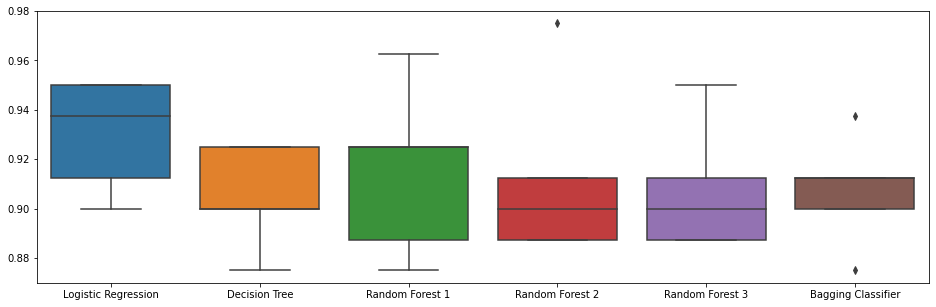

In [236]:
fig_dims = (16, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=crossval);

My optimum model is the Random Forest after Hyper Tuning since the variance is less, but in both Logistic regression and Random forest there is an outlier, the last fold has more accuracy in both compared to other 4 folds. The best accuracy and low variance is achieved by fine tuning the random forest model and dropping the Research parameter. However if we don't want any outliers, we can go for Decision tree model as it does not have any outliers and the variance is also low. 

My optimum model without outlier is Decision tree and my optimum model with outlier is random forest 3 as the variance is the least in that.